In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import joblib

# Load Data
df = pd.read_csv('diabetes.csv')

In [3]:
def clean_data(data):
    # 1. Replace zeros with NaN
    cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness','DiabetesPedigreeFunction','Insulin', 'BMI']
    data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)
    
    # 2. Fill NaN with mean
    for col in cols_with_zeros:
        data[col] = data[col].fillna(data[col].mean())
        
    return data

In [4]:
# Apply the cleaning
df_clean = clean_data(df)

# Define X and y
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the Balanced Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5, 
    class_weight='balanced', 
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


--- Final Model Performance ---
Accuracy: 0.7597402597402597
Recall: 0.8181818181818182
Confusion Matrix:
 [[72 27]
 [10 45]]


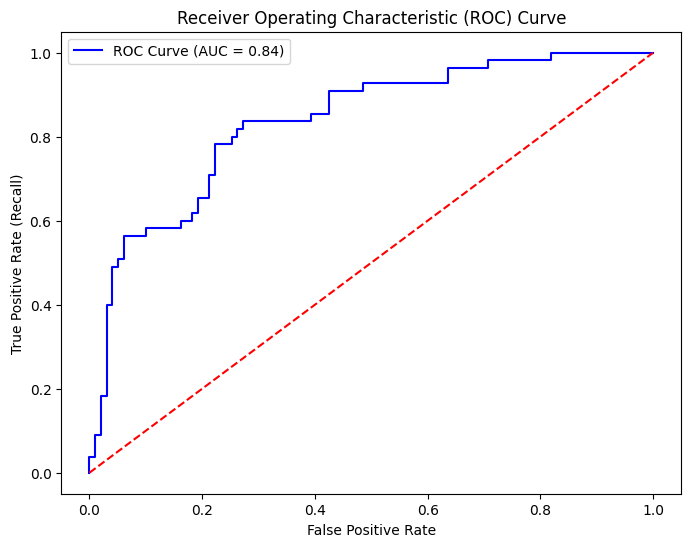

In [7]:
y_pred = rf_model.predict(X_test)

# Print Metrics
print("--- Final Model Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for the positive class (1)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate scores
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [8]:

# Save the model to a file
joblib.dump(rf_model, 'diabetes_model_rf.pkl')

print("Model saved successfully!")


Model saved successfully!
